# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [40]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt


# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [6]:
# Run this code:

pokemon_df = pd.read_csv('../../Module_1/Lab_29_Dataframe-Calculations/Pokemon.csv', sep=',')

Let's start off by looking at the `head` function in the cell below.

In [7]:
pokemon_df.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [32]:
#print('Legendary:',len(pokemon_df[pokemon_df["Legendary"] == True]))
#print('Legendary:',len(pokemon_df[pokemon_df["Legendary"] == False]))

pokemon_df["Legendary"].value_counts().to_frame()

,Legendary
False,735
True,65


Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [33]:

means = pokemon_df.groupby('Legendary')['Total'].mean()

stdevs = pokemon_df.groupby('Legendary')['Total'].std()

print('mean','\n',means,'\n\n','stdev','\n',stdevs)

mean 
 Legendary
False    417.213605
True     637.384615
Name: Total, dtype: float64 

 stdev 
 Legendary
False    106.760417
True      60.937389
Name: Total, dtype: float64


The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

In [47]:
#define variables for the 'Total' values of legendary and non-legendary Pokémons

legendary = pokemon_df[pokemon_df["Legendary"] == True]
legendary = legendary['Total']

non_legendary = pokemon_df[pokemon_df["Legendary"] == False]
non_legendary = non_legendary['Total']


In [48]:
print(legendary)

156    580
157    580
158    580
162    680
163    780
      ... 
795    600
796    700
797    600
798    680
799    600
Name: Total, Length: 65, dtype: int64


In [49]:
print(non_legendary)

0      318
1      405
2      525
3      625
4      309
      ... 
787    494
788    304
789    514
790    245
791    535
Name: Total, Length: 735, dtype: int64


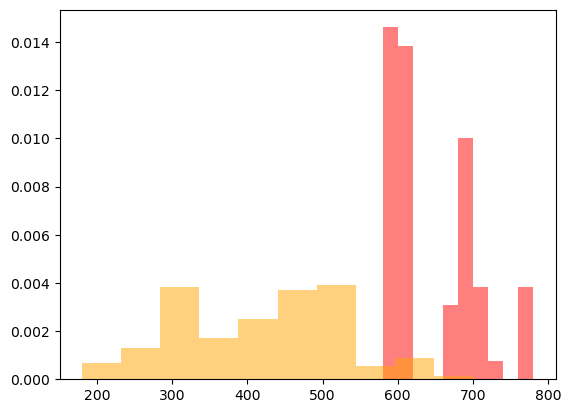

In [83]:
#Histograms

plt.hist(legendary, alpha=.5, color='red', bins=10, density=True);
plt.hist(non_legendary, alpha=.5, color='orange', bins=10, density=True);

In [74]:
#equal_var: bool, optional
#If True (default), perform a standard independent 2 sample test that assumes equal population variances
#If False, perform Welch’s t-test, which does not assume equal population variance.

#Welch's t-test or unequal variances t-test is used to test whether the means of two population are equal.
#This test is generally applied when there is a difference between the variations of two populations
#and also when their sample sizes are unequal.

stats.ttest_ind(legendary, non_legendary, equal_var=False).pvalue

#equal_var=True by default > returns p-value = 3.0952457469652825e-52
#equal_var=False > stats.ttest_ind(legendary, non_legendary, equal_var=False).pvalue returns 9.357954335957446e-47



9.357954335957446e-47

What do you conclude from this test? Write your conclusions below.

In [ ]:
#The p-value is so small that we can firmly reject the hypothesis that the 'Total' value
#of the Legendary and Non-legendary are similar

#("If p-value =< 0.05 : reject H0")


How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

In [66]:
# Your code here:
pokemon_df["Type 1"].value_counts().to_frame()

,Type 1
Water,112
Normal,98
Grass,70
Bug,69
Psychic,57
Fire,52
Electric,44
Rock,44
Dragon,32
Ground,32


Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all other Pokemon.

In [85]:
#Isolate Type 1 Water Pokémons and store their Total
water = pokemon_df[pokemon_df["Type 1"] == 'Water']
water = water['Total']

#Isolate Other types of Pokémons and store their Total
other_types = pokemon_df[pokemon_df["Type 1"] != 'Water']
other_types = other_types['Total']


print('Water Mean:',water.mean())
print('Water st dev:',water.std())
print('\n')
print('Other types mean:',other_types.mean())
print('Other types st dev:',other_types.std())

Water Mean: 430.45535714285717
Water st dev: 113.18826606431458


Other types mean: 435.85901162790697
Other types st dev: 121.09168230208066


Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

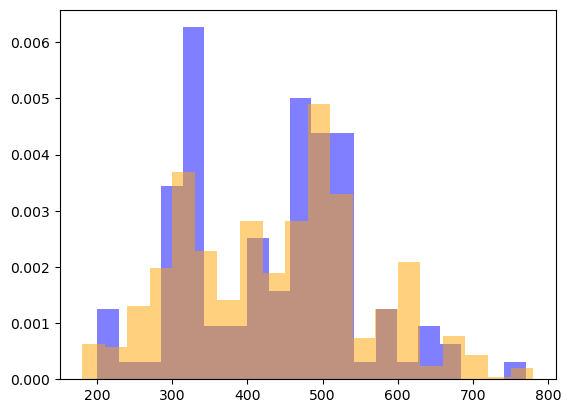

In [86]:
#Histograms

plt.hist(water, alpha=.5, color='blue', bins=20, density=True);
plt.hist(other_types, alpha=.5, color='orange', bins=20, density=True);


In [87]:
stats.ttest_ind(water, other_types, equal_var=True).pvalue


0.6587140317488793

Write your conclusion below.

In [88]:
#p-value = 0.66
#We cannot reject the hypothesis that the Pokémon of Type 1 Water have Total values similar to the other types.


# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

In [91]:
from scipy.stats import ttest_rel

stats.ttest_rel(pokemon_df["Attack"], pokemon_df["Defense"])


#Calculate the t-test on TWO RELATED samples of scores, a and b.
#This is a test for the null hypothesis that two related or repeated samples
#have identical average (expected) values.

Ttest_relResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05)

Describe the results of the test in the cell below.

In [12]:
#Considering the low p-value, the hypothesis that Attack and Defense levels are equal is rejected.

We are also curious about whether therer is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

In [92]:
stats.ttest_rel(pokemon_df["Sp. Atk"], pokemon_df["Sp. Def"])

Ttest_relResult(statistic=0.853986188453353, pvalue=0.3933685997548122)

Describe the results of the test in the cell below.

In [14]:
#Considering the p-value is significant, we cannot reject the hypothesis that the Sp. attack and sp. defense are related.


As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

In [103]:
from scipy.stats import ttest_1samp

#print('attack mean: ', pokemon_df["Attack"].mean())
#print('defense mean: ', pokemon_df["Defense"].mean())

print('A-D mean: ', (pokemon_df["Attack"]-pokemon_df["Defense"]).mean())
#print('defense mean: ', pokemon_df["Defense"].mean())


#ad_diff_mean = pokemon_df["Attack"].mean()-pokemon_df["Defense"].mean()
#print('A-D mean: ', ad_diff_mean)

A-D mean:  5.15875


In [104]:
stats.ttest_1samp(pokemon_df["Attack"]-pokemon_df["Defense"], popmean=0).pvalue


1.7140303479358558e-05

# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [17]:
# Your code here:



Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html).

In [18]:
# Your code here:



Based on a 95% confidence, should we reject the null hypothesis?

In [19]:
# Your answer here:

